# SUPPORT VECTOR MACHINES

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, **`capable of performing linear or nonlinear classification, regression, and even outlier detection`**. SVMs are particularly **`well suited for classification of complex small- or medium-sized datasets`**.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear SVM Classification

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called `large margin classification`.

The next few code cells generate the first figures in chapter 5. The first actual code sample comes after:

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [46]:
type(iris), type(X), type(y)

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [47]:
X.shape, y.shape

((100, 2), (100,))

In [108]:
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [52]:
svm_clf.coef_, svm_clf.intercept_

(array([[1.29411744, 0.82352928]]), array([-3.78823471]))

Saving figure large_margin_classification_plot


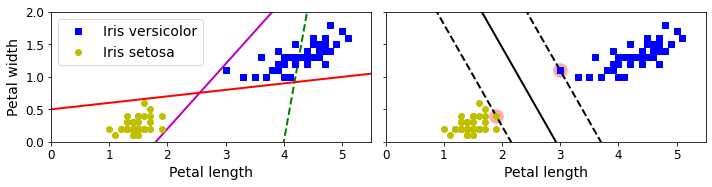

In [109]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

From above figure: Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the `support vectors`.

### Sensitivity to feature scales

# Warning

> SVMs are sensitive to the feature scales, as you can see in Figure below: in the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s `StandardScaler`), the decision boundary in the right plot looks much better.

Saving figure sensitivity_to_feature_scales_plot


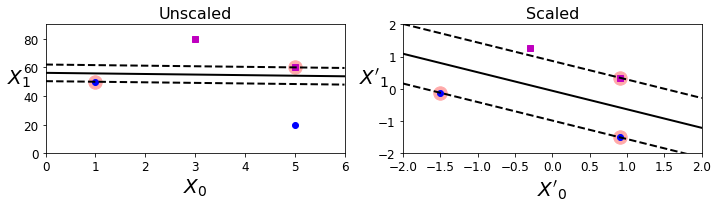

In [110]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]])
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(Xs, ys)

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(0, 5, 50)
decision_boundry = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundry + margin
gutter_down = decision_boundry - margin

# fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], 'bo')
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], 'ms')
# plt.plot(x0, decision_boundry, 'k-', linewidth=2)
# plt.plot(x0, gutter_up, 'k--', linewidth=2)
# plt.plot(x0, gutter_down, 'k--', linewidth=2)
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$X_0$', fontsize=20)
plt.ylabel('$X_1$', rotation=0, fontsize=20)
plt.title('Unscaled', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], 'bo')
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$X'_0$", fontsize=20)
plt.ylabel("$X'_1$", rotation=0, fontsize=20)
plt.title('Scaled', fontsize=16)
plt.axis([-2, 2, -2, 2])
# plt.show()
save_fig("sensitivity_to_feature_scales_plot")

In [111]:
svm_clf.intercept_, svm_clf.coef_

(array([0.06246103]), array([[0.62225468, 1.0825318 ]]))

## Soft Margin Classification

If we strictly impose that all instances must be off the street and on the right side, this is called `hard margin classification.` <br>

There are **two main issues** with hard margin classification:
* First, it only works if the data is linearly separable.
* Second, it is sensitive to outliers.

### Sensitivity to Outliers

Below fig shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one we saw in 1st Figure without the outlier, and it will probably not generalize as well.

Saving figure sensitivity_to_outliers_plot


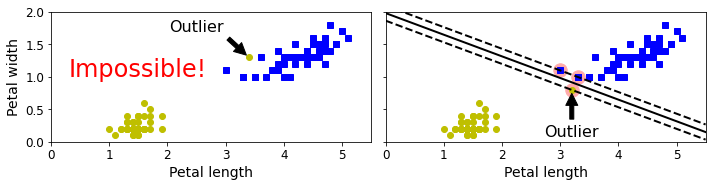

In [114]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=float('inf'))
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

To avoid these issues, use a more flexible model. The objective is to find a `good balance between keeping the street as large as possible and limiting the margin violations` (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **`soft margin classification`**.

When creating an SVM model using Scikit-Learn, we can specify a number of hyperparameters. <br>
$C$ is one of those hyperparameters. If we set it to a low value, then we end up with the model on the left of Figure below. With a high value, we get the model on the right. Margin violations are bad. It’s usually better to have few of them. However, in this case the model on the left has a lot of margin violations but will probably generalize better.

The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the `LinearSVC` class with $C=1$ and the `hinge loss` function, described shortly) to detect Iris virginica flowers:

In [117]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length and petal width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [118]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:

In [190]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, random_state=42, loss='hinge')
svm_clf2 = LinearSVC(C=100, random_state=42, loss='hinge')

scaled_svm_clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_clf', svm_clf1),
])
scaled_svm_clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_clf', svm_clf2),
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/home/owl/Documents/venv/tlfMaths3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_clf',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [194]:
scaled_svm_clf1['scaler'].mean_, scaled_svm_clf1['scaler'].scale_

(array([3.758     , 1.19933333]), array([1.75940407, 0.75969263]))

In [191]:
# Convert to unscaled parameters
scaler = scaled_svm_clf1['scaler']
b1 = scaled_svm_clf1['linear_clf'].decision_function([-scaler.mean_ / scaler.scale_])
w1 = scaled_svm_clf1['linear_clf'].coef_[0] / scaler.scale_
scaler = scaled_svm_clf2['scaler']
b2 = scaled_svm_clf2['linear_clf'].decision_function([-scaler.mean_ / scaler.scale_])
w2 = scaled_svm_clf2['linear_clf'].coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


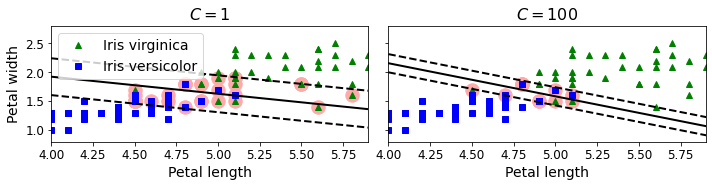

In [193]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# TIP 

> `If your SVM model is overfitting, you can try regularizing it by reducing` $C$.

# NOTE

> Unlike Logistic Regression classifiers, SVM classifiers do not output probabilites for each class

`Instead of using the LinearSVC class, we could use the SVC class with a linear kernel. When creating the SVC model, we would write SVC(kernel="linear", C=1). Or we could use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)).` <br>
This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but **_`it can be useful to handle online classification tasks or huge datasets that do not fit in memory (out-of-core training).`_**

# TIP

> The `LinearSVC` class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the `StandardScaler`. Also make sure you set the loss hyperparameter to "hinge", as it is not the default value. Finally, for better performance, you should set the `dual hyperparameter to False, unless there are more features than training instances` (we will discuss duality later in the chapter).

## Nonlinear SVM Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. <br>
* One approach to handling nonlinear datasets is to add more features, such as polynomial features (as you did in Chapter 4); in some cases this can result in a linearly separable dataset. Consider the left plot in Figure below: it represents a simple dataset with just one feature, $x_1$. This dataset is not linearly separable, as you can see. But if you add a second feature $x_2 = (x_1)^2$, the resulting 2D dataset is perfectly linearly separable.

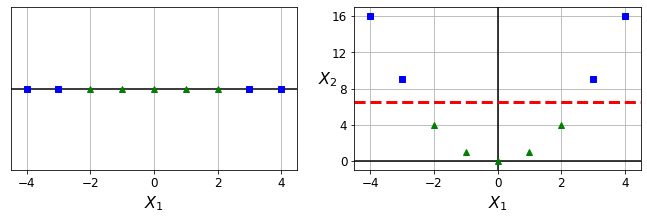

Saving figure higher_dimensions_plot


<Figure size 432x288 with 0 Axes>

In [11]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y == 1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('$X_1$', fontsize=16)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], 'bs')
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], 'g^')
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.ylabel('$X_2$', rotation=0, fontsize=16)
plt.xlabel('$X_1$', fontsize=16)
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()
save_fig("higher_dimensions_plot", tight_layout=False)

To implement this idea using Scikit-Learn, create a Pipeline containing a `PolynomialFeatures transformer` (discussed in “Polynomial Regression”), followed by a `StandardScaler` and a `LinearSVC`. <br>
Let’s test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles (see Figure below). You can generate this dataset using the `make_moons()` function:

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

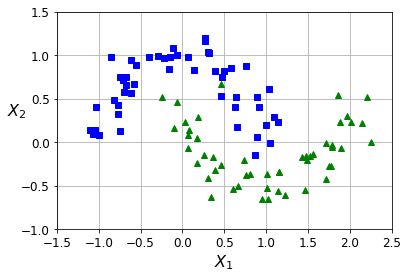

In [275]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
    plt.grid(True, which='both')
    plt.xlabel('$X_1$', fontsize=16)
    plt.ylabel("$X_2$", fontsize=16, rotation=0)
    plt.axis(axes)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [228]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
])

polynomial_svm_clf.fit(X, y)

/home/owl/Documents/venv/tlfMaths3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [229]:
X.shape, y.shape

((100, 2), (100,))

In [230]:
np.unique(y)

array([0, 1])

In [231]:
X[:3]

array([[ 1.01411674, -0.36843238],
       [ 0.80909039, -0.36441603],
       [ 1.89913185, -0.06847189]])

Saving figure moons_polynomial_svc_plot


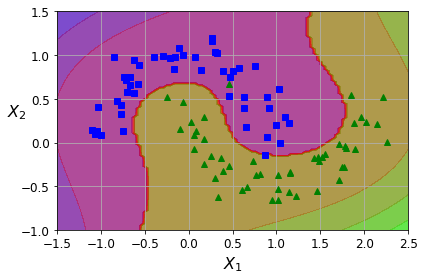

In [365]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.4)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

In [366]:
xpred = [55.0873127, 100]
polynomial_svm_clf.predict([xpred]), polynomial_svm_clf.decision_function([xpred])

(array([0]), array([-0.0003913]))

In [367]:
xpred = [0.5, 100]
polynomial_svm_clf.predict([xpred]), polynomial_svm_clf.decision_function([xpred])

(array([0]), array([-4698716.36422922]))

### Polynomial Kernel

`Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs). That said, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.`

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the _`kernel trick`_ (explained in a moment). <br>
The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because you don’t actually add any features. This trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [8]:
from sklearn.svm import SVC

In [360]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=5, kernel='poly', degree=3, coef0=1)),
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a third-degree polynomial kernel. It is represented on the left in Figure below. On the right is another SVM classifier using a 10th-degree polynomial kernel. <br>
Obviously, **`if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.`**

In [368]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=5, kernel='poly', degree=10, coef0=100)),
])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


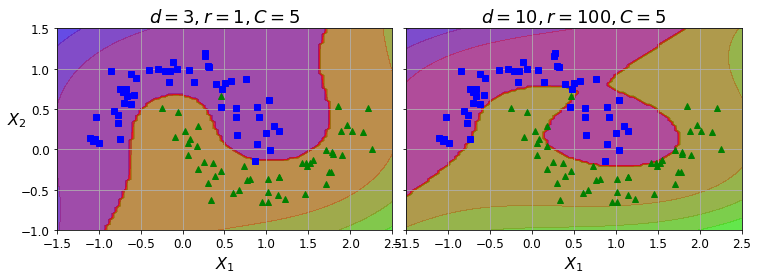

In [369]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("$d = 3, r = 1, C = 5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("$d = 10, r = 100, C = 5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

# TIP

> A common approach to finding the right hyperparameter values is to use grid search (see Chapter 2). It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.

### Similarity Features

Another technique to `tackle nonlinear problems is to add features` computed using a `similarity function`, which measures how much each instance resembles a particular landmark. <br>
For example, let’s take the 1D dataset discussed earlier and add two landmarks to it at $x_1 = –2$ and $x_1 = 1$ (see the left plot in Figure 5-8). Next, let’s define the similarity function to be the Gaussian Radial Basis Function (RBF) with $γ = 0.3$ (see Equation 5-1).

Equation 5-1. Gaussian RBF
$$\phi_{\gamma}(\mathbf{x}, l) = \exp(-\gamma\parallel\mathbf{x} - l\parallel^2)$$

This is a bell-shaped function varying from $0$ (very far away from the landmark) to $1$ (at the landmark). Now we are ready to compute the new features. For example, let’s look at the instance $x_1 = –1$: it is located at a distance of $1$ from the first landmark and $2$ from the second landmark. Therefore its new features are $x_2 = exp(–0.3 × 1^2) ≈ 0.74$ and $x_3 = exp(–0.3 × 2^2) ≈ 0.30$. The plot on the right in Figure below shows the transformed dataset (dropping the original features). As you can see, it is now linearly separable.

(200, 1) (200,) (200,)
(9, 1) (9, 2) (9,)
Saving figure kernel_method_plot


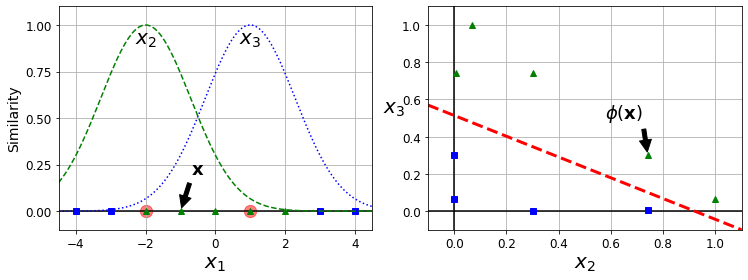

In [13]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

print(x1s.shape, x2s.shape, x3s.shape)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

print(X1D.shape, XK.shape, yk.shape)

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

You may wonder _**how to select the landmarks**_. <br>
The simplest approach is to create a landmark at the location of each and every instance in the dataset. Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

In [18]:
x1_example = X1D[3, 0]
gamma = 0.3
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), landmark, gamma)
    print('Phi({}, {}) = {}'.format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


#### Gaussian RBF Kernel

`Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm`, **but it may be computationally expensive to compute all the additional features, especially on large training sets**. <br>
Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features. Let’s try the SVC class with the Gaussian RBF kernel:

In [14]:
X, y = make_moons(n_samples=100, noise=0.15)

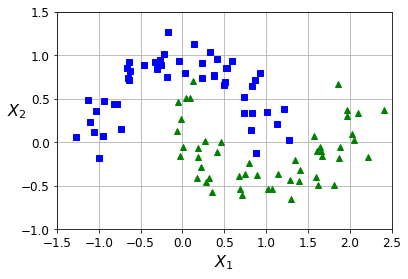

In [22]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [15]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

This model is represented at the bottom left in Figure below. The other plots show models trained with different values of hyperparameters gamma ($\gamma$) and $C$. Increasing gamma makes the bell-shaped curve narrower (see the righthand plots in Figure above(gaussian one)). As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. **So $\gamma$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it; if it is underfitting, you should increase it (similar to the C hyperparameter).**

Saving figure moons_rbf_svc_plot


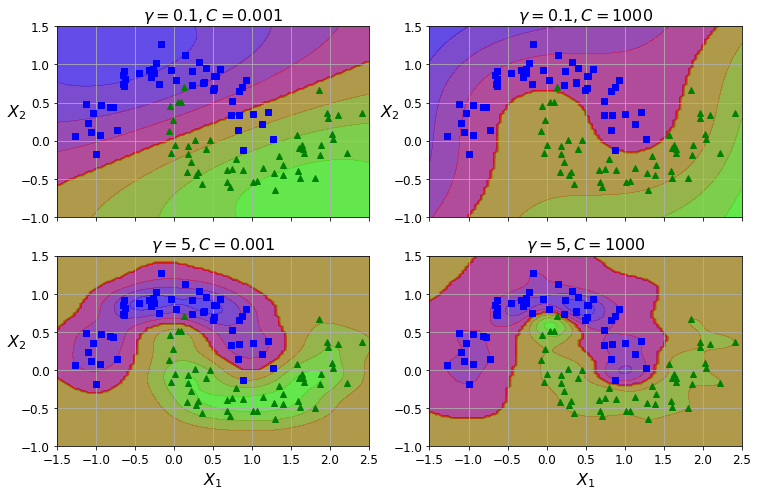

In [26]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C)),
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title('$\gamma = {}, C = {}$'.format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    elif i in (1, 3):
        plt.ylabel('')

save_fig('moons_rbf_svc_plot')
plt.show()

**_`Other kernels exist but are used much more rarely.`_** <br>
`Some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).`

# TIP

> `With so many kernels to choose from, how can you decide which one to use?` <br>
**`As a rule of thumb, you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel="linear")), especially if the training set is very large or if it has plenty of features. If the training set is not too large, you should also try the Gaussian RBF kernel; it works well in most cases. Then if you have spare time and computing power, you can experiment with a few other kernels, using cross-validation and grid search. You’d want to experiment like that especially if there are kernels specialized for your training set’s data structure.`**

#### Computation Complexity

The `LinearSVC` class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. Its training time complexity is roughly $O(m × n)$.

**`The algorithm takes longer if you require very high precision. This is controlled by the tolerance hyperparameter` $ϵ$ `(called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine.`**

The `SVC` class is based on the libsvm library, which implements an algorithm that supports the kernel trick. The training time complexity is usually between $O(m^2 × n)$ and $O(m^3 × n)$. <br>
Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances). This algorithm is perfect for complex small or medium-sized training sets. It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance. Table 5-1 compares Scikit-Learn’s SVM classification classes.

![Comparison of Scikit-Learn classes for SVM Classification](images/svm/comparison_of_SkLearn_classes_for_SVM_classification.png)

## SVM Regression

As mentioned earlier, the `SVM` algorithm is versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, $ϵ$. Figure below shows two linear SVM Regression models trained on some random linear data, one with a large margin $(ϵ = 1.5)$ and the other with a small margin $(ϵ = 0.5)$.

In [50]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [51]:
X.shape, y.shape

((50, 1), (50,))

In [12]:
from sklearn.svm import LinearSVR

In [13]:
LinearSVC??

Init signature:
LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    *,
    dual=True,
    tol=0.0001,
    C=1.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=1000,
)
Source:        
class LinearSVC(BaseEstimator, LinearClassifierMixin,
                SparseCoefMixin):
    """Linear Support Vector Classification.

    Similar to SVC with parameter kernel='linear', but implemented in terms of
    liblinear rather than libsvm, so it has more flexibility in the choice of
    penalties and loss functions and should scale better to large numbers of
    samples.

    This class supports both dense and sparse input and the multiclass support
    is handled according to a one-vs-the-rest scheme.

    Read more in the :ref:`User Guide <svm_classification>`.

    Parameters
    ----------
    penalty : {'l1', 'l2'}, default='l2'
        Specifies the norm used in the penalization. The 'l2'

In [14]:
LinearSVR??

Init signature:
LinearSVR(
    *,
    epsilon=0.0,
    tol=0.0001,
    C=1.0,
    loss='epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    verbose=0,
    random_state=None,
    max_iter=1000,
)
Source:        
class LinearSVR(RegressorMixin, LinearModel):
    """Linear Support Vector Regression.

    Similar to SVR with parameter kernel='linear', but implemented in terms of
    liblinear rather than libsvm, so it has more flexibility in the choice of
    penalties and loss functions and should scale better to large numbers of
    samples.

    This class supports both dense and sparse input.

    Read more in the :ref:`User Guide <svm_regression>`.

    .. versionadded:: 0.16

    Parameters
    ----------
    epsilon : float, default=0.0
        Epsilon parameter in the epsilon-insensitive loss function. Note
        that the value of this parameter depends on the scale of the target
        variable y. If unsure, set ``epsilon=0``.

    tol : 

In [52]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [53]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)

svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
print(eps_y_pred)

[6.52640746]


Saving figure svm_regression_plot


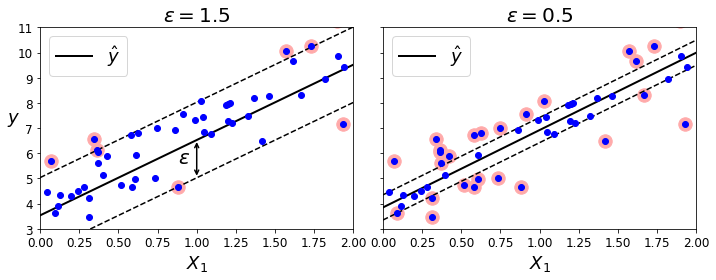

In [59]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label='$\hat{y}$')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, 'bo')
    plt.xlabel("$X_1$", fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))

plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title("$\epsilon = 1.5$", fontsize=20)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
            xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
            textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.88, 5.6, r'$\epsilon$', fontsize=20)

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title("$\epsilon = 0.5$", fontsize=20)

save_fig("svm_regression_plot")
plt.show()

Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be _**`ϵ-insensitive.`**_

To `tackle nonlinear regression tasks`, you can use a kernelized SVM model. Figure below shows SVM Regression on a random quadratic training set, using a second-degree polynomial kernel. There is little regularization in the left plot (i.e., a large C value), and much more regularization in the right plot (i.e., a small C value).

In [60]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [61]:
from sklearn.svm import SVR

In [63]:
svr_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svr_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [66]:
svr_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svr_poly_reg1.fit(X, y)

svr_poly_reg2 = SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1, gamma='scale')
svr_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


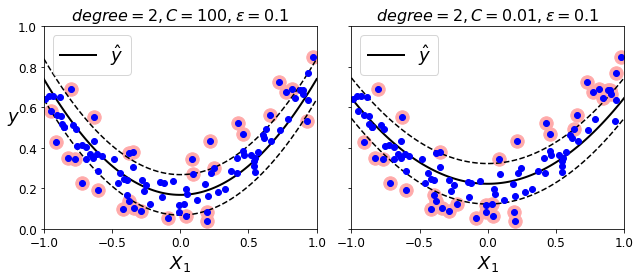

In [76]:
fit, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

plt.sca(axes[0])
plot_svm_regression(svr_poly_reg1, X, y, [-1, 1, 0, 1])
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.title("$degree = {}, C = {}, \epsilon = {}$".format(svr_poly_reg1.degree, svr_poly_reg1.C, svr_poly_reg1.epsilon), fontsize=16)

plt.sca(axes[1])
plot_svm_regression(svr_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title("$degree = {}, C = {}, \epsilon = {}$".format(svr_poly_reg2.degree, svr_poly_reg2.C, svr_poly_reg2.epsilon), fontsize=16)

save_fig("svm_with_polynomial_kernel_plot")
plt.show()

The _SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class_. <br>
The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).

# NOTE

> _**`SVMs can also be used for outlier detection`**_; see Scikit-Learn's documentation for more details